In [15]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [16]:
flag = pd.read_csv("flags.csv", names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])
flag.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [17]:
flag = pd.get_dummies(flag)
flag.head()

,landmass,zone,area,population,language,religion,bars,stripes,colors,red,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,5,1,648,16,10,2,0,3,5,1,...,0,0,0,0,0,0,1,0,0,0
1,3,1,29,3,6,6,0,0,3,1,...,1,0,0,0,0,0,0,0,1,0
2,4,1,2388,20,8,2,2,0,3,1,...,0,0,0,0,0,0,0,0,0,1
3,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,0,0,0,0,1,0
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
list(flag.columns)

['landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colors',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'name_Afghanistan',
 'name_Albania',
 'name_Algeria',
 'name_American-Samoa',
 'name_Andorra',
 'name_Angola',
 'name_Anguilla',
 'name_Antigua-Barbuda',
 'name_Argentina',
 'name_Argentine',
 'name_Australia',
 'name_Austria',
 'name_Bahamas',
 'name_Bahrain',
 'name_Bangladesh',
 'name_Barbados',
 'name_Belgium',
 'name_Belize',
 'name_Benin',
 'name_Bermuda',
 'name_Bhutan',
 'name_Bolivia',
 'name_Botswana',
 'name_Brazil',
 'name_British-Virgin-Isles',
 'name_Brunei',
 'name_Bulgaria',
 'name_Burkina',
 'name_Burma',
 'name_Burundi',
 'name_Cameroon',
 'name_Canada',
 'name_Cape-Verde-Islands',
 'name_Cayman-Islands',
 'name_Central-African-Republic',
 'name_Chad',
 'name_Chile',
 'name_China',


In [24]:
len(X.columns)

243

In [27]:
len(flag.religion)

194

In [35]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = flag.drop(columns='religion')
y = flag["religion"].values.reshape(-1,1)

In [36]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [37]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [38]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [39]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

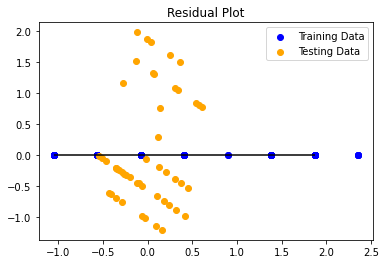

In [40]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [41]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8134718986109144, R2: 0.19202404045346855


In [42]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0108015696922261, R2: -0.003972441553076633


In [43]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8134724288930792, R2: 0.1920235137539701


In [44]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0130150047445328, R2: -0.006170922303715187
